# 단순선형회귀분석(변인한개)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### 임의로 가중치(직선의 기울기와 절편) 추정

### (Quiz) scatter 시각화

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8]
[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


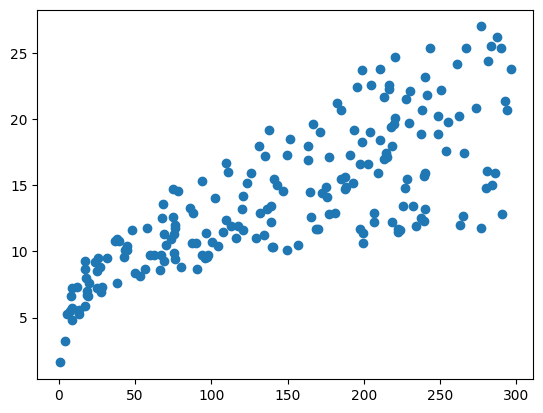

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 'FB_sales.csv' 파일에서 데이터 로드. 첫 번째 행은 제외하고, 콤마로 구분된 데이터를 로드
data = np.loadtxt('/content/FB_sales.csv', delimiter=',', skiprows=1)

# 데이터의 첫 번째 열을 FB로, 두 번째 열을 Sales로 할당
FB = data[:, 1]
Sales = data[:, 2]

# FB와 Sales의 첫 10개 데이터 출력
print(FB[:10])
print(Sales[:10])

# FB와 Sales 데이터를 이용하여 산점도 그리기
plt.scatter(FB, Sales)

# 그래프 보여주기
plt.show()


### 기울기와 절편 추정 (인간 추정)

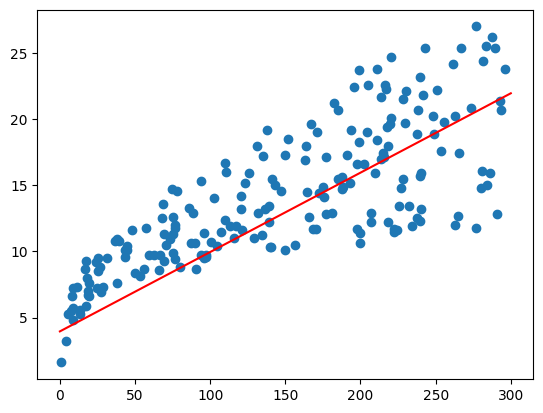

In [26]:
beta_0 = 0.06 # 기울기
bata_1 = 3.95 # 절편

plt.scatter(FB, Sales)
plt.plot([0, 300], [beta_1, 300 * beta_0 + beta_1], 'r')
# 그래프를 화면에 표시
plt.show()

### (Quiz) 소스에서 loss()완성해서 loss값 출력해보기

Loss: 13.21427202


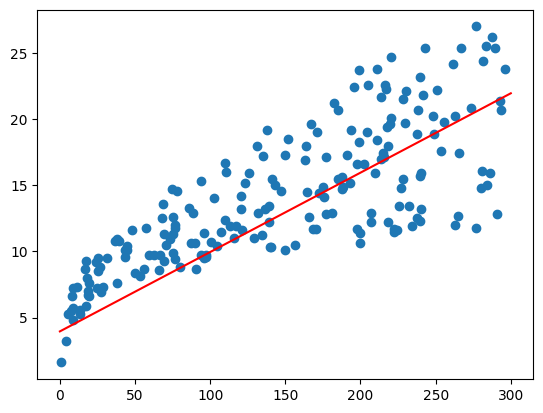

In [28]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def loss(x, y, beta_0, beta_1):
    # 손실 계산 (평균 제곱 오차)
    ms = np.sum( (y-(beta_0 * x + beta_1)) ** 2) # 실제값과 예측값의 차이를 제곱 한 후, 평균 계산
    Loss = ms / len(x) #
    return Loss

# 데이터 로드
data = np.loadtxt('FB_sales.csv', delimiter=',', skiprows=1)
FB = data[:, 1]  # FB는 첫 번째 열
Sales = data[:, 2]  # Sales는 두 번째 열

# 산점도 그리기
plt.scatter(FB, Sales)

# 선형 회귀선 그리기
beta_0 = 0.06
beta_1 = 3.95
plt.plot([0, 300], [beta_1, 300 * beta_0 + beta_1], 'r')

# 손실 함수의 결과 출력
print("Loss:", loss(FB, Sales, beta_0, beta_1))

# 그래프 표시
plt.show()


### sklearn을 이용하여 최적의 가중치 구하기

기울기 beta_0: 0.05
절편 beta_1: 7.03
손실값: 10.51


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

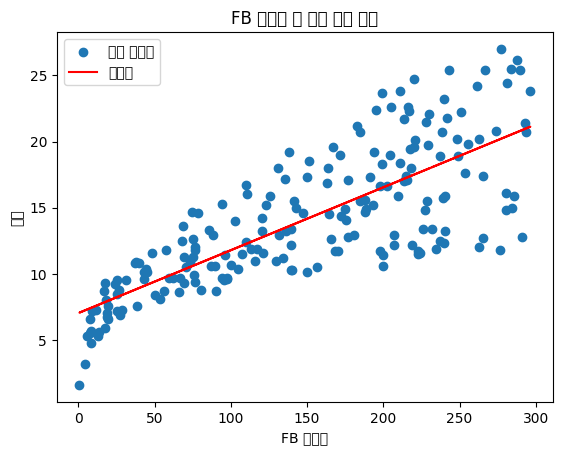

In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수 정의 (평균 제곱 오차)
def loss(x, y, beta_0, beta_1):
    # 모델로부터 예측값 계산
    predictions = beta_0 * x + beta_1 # 예상값(함수)
    # 예측값과 실제값의 차이의 제곱의 합을 계산
    ms = np.sum((predictions - y) ** 2)
    # 평균 제곱 오차 계산
    Loss = ms / len(x)
    return Loss

# 데이터 로드
data = np.loadtxt('FB_sales.csv', delimiter=',', skiprows=1)
FB = data[:, 1]  # FB 판매 데이터 (독립 변수)
Sales = data[:, 2]  # Sales 데이터 (종속 변수)


###################### 중요!!!!!!!!!!!!!!! 독립변위는 2차원 배열로 변환

# 데이터 학습을 위한 형태 변환
train_X = FB.reshape(-1, 1)  # 독립 변수는 2차원 배열로 변환(-1은 넘파이가 해당 차원의 크기를 자동으로 결정하도록 지시)
train_Y = Sales  # 종속 변수는 1차원 배열이어도 됩니다

# 선형 회귀 모델 생성 및 학습
lrmodel = LinearRegression()
lrmodel.fit(train_X, train_Y)

# 계수(기울기)와 절편 추출
beta_0 = lrmodel.coef_[0]  # 기울기
beta_1 = lrmodel.intercept_  # 절편

# 산점도 및 회귀선 표시
plt.scatter(FB, Sales, label='실제 데이터')
Sales_predict = lrmodel.predict(train_X)
plt.plot(train_X, Sales_predict, 'r', label='회귀선')

# 그래프 타이틀 및 레이블
plt.title("FB 판매량 대 매출 회귀 분석")
plt.xlabel("FB 판매량")
plt.ylabel("매출")
plt.legend()

# 결과 출력
print("기울기 beta_0: %.2f" % beta_0)
print("절편 beta_1: %.2f" % beta_1)
print("손실값: %.2f" % loss(FB, Sales, beta_0, beta_1))

# 그래프 표시
plt.show()


# 다중선형회귀분석(변인여러개)

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

data=np.loadtxt("FB_TV_News_sales.csv",delimiter=',',skiprows=1)
X=data[:,1:-1] # 행 전부, 열은 1열부터 마지막 열(-1) 의 바로 전까지
# X가 광고
Y=data[:,-1] # 모든 행의 마지막 열만 출력

lrmodel=LinearRegression()
lrmodel.fit(X,Y)

beta_0=lrmodel.coef_[0] # 기울기
beta_1=lrmodel.coef_[1] # 기울기
beta_2=lrmodel.coef_[2] # 기울기
beta_3=lrmodel.intercept_ # 절편

print('beta_0: %f'%beta_0)
print('beta_1: %f'%beta_1)
print('beta_2: %f'%beta_2)
print('beta_3: %f'%beta_3)

beta_0: 0.045765
beta_1: 0.188530
beta_2: -0.001037
beta_3: 2.938889


## 가중치를 모두 구했으니 실제 예측해보자.

In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

data=np.loadtxt("FB_TV_News_sales.csv",delimiter=',',skiprows=1)


X=data[:, 1:-1]
Y=data[:, -1]

lrmodel=LinearRegression()
lrmodel.fit(X,Y)

beta_0=lrmodel.coef_[0] # 기울기
beta_1=lrmodel.coef_[1] # 기울기
beta_2=lrmodel.coef_[2] # 기울기
beta_3=lrmodel.intercept_ # 절편

#print('beta_0: %f'%beta_0)
#print('beta_1: %f'%beta_1)
#print('beta_2: %f'%beta_2)
#print('beta_3: %f'%beta_3)

#여기 구현
def expected_sales(fb,tv,newspaper,beta_0,beta_1,beta_2,beta_3):
    value=np.array([fb,tv,newspaper])
    weight=np.array([beta_0,beta_1,beta_2])
    sales=value@weight+beta_3
    return sales

fb,tv,newspaper=eval(input('페이스북,TV,신문 광고투입액? '))
print("예상되는 판매량: %f"%expected_sales(fb,tv,newspaper,beta_0,beta_1,beta_2,beta_3))

페이스북,TV,신문 광고투입액? 230.1, 37.8, 69.2
예상되는 판매량: 20.523974


### Quiz: loss function구하기

In [35]:
def loss(X, Y, beta_0, beta_1, beta_2, beta_3):
    # 계수를 배열로 정리
    weight = np.array([beta_0, beta_1, beta_2])
    # 예측값 계산: X의 각 행에 대해 weight를 곱하고, beta_3를 더합니다.
    predictions = X.dot(weight) + beta_3
    # 실제값 Y와 예측값 predictions의 차이의 제곱의 합을 계산
    diff = np.sum(np.power((Y - predictions), 2))
    # 평균 제곱 오차(MSE) 반환
    return diff / len(X)

# 예를 들어, X와 Y, 그리고 회귀 계수가 다음과 같이 정의되어 있다고 가정합니다.
# X = np.array([[1, 50, 50], [1, 60, 60], [1, 70, 70]])  # 예시 데이터
# Y = np.array([100, 200, 300])  # 예시 목표 값
# beta_0, beta_1, beta_2, beta_3 = 0.5, 0.5, 0.5, 10  # 예시 회귀 계수

# 손실 함수 출력
print("Loss function ---> %.6f" % loss(X, Y, beta_0, beta_1, beta_2, beta_3))


Loss function ---> 2.784126


## 데이터를 훈련(train)과 테스트용(test)로 분리

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data=np.loadtxt("FB_TV_News_sales.csv",delimiter=',',skiprows=1)
X=data[:,1:-1]
Y=data[:,-1]

x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
print(x_train[:3,:])
print(x_test[:3,:])

lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)
beta_0=lrmodel.coef_[0] # 기울기
beta_1=lrmodel.coef_[1] # 기울기
beta_2=lrmodel.coef_[2] # 기울기
beta_3=lrmodel.intercept_ # 절편

print('beta_0: %f'%beta_0)
print('beta_1: %f'%beta_1)
print('beta_2: %f'%beta_2)
print('beta_3: %f'%beta_3)

predicted_y_train=lrmodel.predict(x_train)
mse_train=mean_squared_error(y_train,predicted_y_train)
print("MSE on train data: %f"%mse_train)

predicted_y_test=lrmodel.predict(x_test)
mse_test=mean_squared_error(y_test,predicted_y_test)
print("MSE on test data: %f"%mse_test)


[[131.7  18.4  34.6]
 [239.3  15.5  27.3]
 [ 17.9  37.6  21.6]]
[[ 19.4  16.   22.3]
 [120.5  28.5  14.2]
 [ 38.   40.3  11.9]]
beta_0: 0.046880
beta_1: 0.182433
beta_2: -0.001647
beta_3: 2.931280
MSE on train data: 2.863956
MSE on test data: 2.550965


### 결정계수구하기

In [37]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, predicted_y_train)
r2_test = r2_score(y_test, predicted_y_test)
print("train의 결정계수:%f"%r2_train)
print("test의 결정계수:%f"%r2_test)

print(1-(mse_train/np.var(y_train))) # 1 - mse_train/y_train의 분산
print(1-(mse_test/np.var(y_test)))

train의 결정계수:0.895696
test의 결정계수:0.898420
0.8956962280033929
0.8984204533332627


# Quiz

In [46]:
import numpy as np
X = np.arange(12).reshape(4, 3)
print(X)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [58]:
A = np.array([12, 13, 14])
X2 = np.append(X, A.reshape(1, -1), axis=0) # -1은 넘파이가 해당 차원의 크기를 자동으로 결정하도록 지시
# axis=0은 배열이 행 방향으로 연결되어야 함을 지시
print(X2)

A = np.array([12, 13, 14])
X2 = np.append(X, A).reshape(-1, 3)
print(X2)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [73]:
poly = np.power(X2[:, 2:], 2) # 2차원으로 만들어야 append가 됨
X3 = np.append(X2, poly, axis=1)
print(X3)

[[  4]
 [ 25]
 [ 64]
 [121]
 [196]]
[[  0   1   2   4]
 [  3   4   5  25]
 [  6   7   8  64]
 [  9  10  11 121]
 [ 12  13  14 196]]


In [75]:
poly = X3[:, 0] * X3[:, 1]
X4 = np.insert(X3, 0, poly, axis=1)
print(X4)

[[  0   0   1   2   4]
 [ 12   3   4   5  25]
 [ 42   6   7   8  64]
 [ 90   9  10  11 121]
 [156  12  13  14 196]]
